<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=3>
    باسمه تعالی
    </font>
    <br><br>
    <font>
    درس یادگیری ماشین
    <br>
        <font size=3>
            مدرس: دکتر سید عباس حسینی
        </font>
    </font>
    <br><br>
    <font>
        <b>فاز اول پروژه</b>
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
    </font>
</div>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=3>
    <div align=center>
        <b>نام</b>: محمدمتین فتوحی
        <br>
        <b>شماره‌ی دانشجویی</b>: 97106143
        <br>
        <b>منابع کمکی</b>:<br> 
        www.scikit-learn.org <br>
        www.seaborn.pydata.org <br>
        www.geeksforgeeks.org <br>
        www.kaggle.com
    </div>
</font>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Binarizer, Normalizer
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('ICUfinal.xlsx', engine="openpyxl", index_col=0)
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0


<br><p style="font-size:40px; text-align: right;" ><b>EDA</b></p>

<br><p style="font-size:20px; text-align: right;line-height:30px;" >همانطور که میدانید بیماری کرونا برای افراد با بیماری های زمینه ای قبلی خطرناک تر از دیگر افراد است.
در این دیتاست یک ردیف با عنوان tags وجور دارد که برای هر فرد, بیماری های زمینه ای او را شامل میشود<br>
    همانطور که در کد زیر مشاهده میشود کل بیماری های لیست شده در این ستون آسم, بیماری کلیوی, بیماری قلبی, سرطان ریه, بیماری نورون حرکتی و کشیدن سیگار است.  </p>

In [4]:
diseases = []
for x in data["tags"]:
    if isinstance(x, str):
        diseases.extend(x.split(", "))
diseases = list(set(diseases))
print(diseases)

['Smoker', 'Kidney disease', 'Motor Neurone Disease', 'heart disease', 'Lung cancer', 'asthma']


<br><p style="font-size:20px; text-align: right;line-height:30px;" >حال میخواهیم سهم هر یک از فراد را در بیمارانی که بستری میشوند
و بیمارانی که بستری نمیشوند بررسی کنیم<br>
تابع زیر تعداد هر کدام از بیماری ها را در بیماران پیدا میکند
</p>

In [5]:
def count_diseases(df):
    disease_count = {}
    for i, row in df.iterrows():
        if isinstance(row["tags"], str):
            for disease in diseases:
                if disease in row["tags"]:
                    disease_count[disease] = disease_count.get(disease, 0) + 1
    disease_count["no illness"] =  len(df.index) - sum(disease_count.values())
    return disease_count

<br><p style="font-size:20px; text-align: right;line-height:30px;" >حال با استفاده از یک نمودار دایره ای سهم هر کدام از بیماری های زمینه ای را در
بیماران نمایش میدهیم
</p>

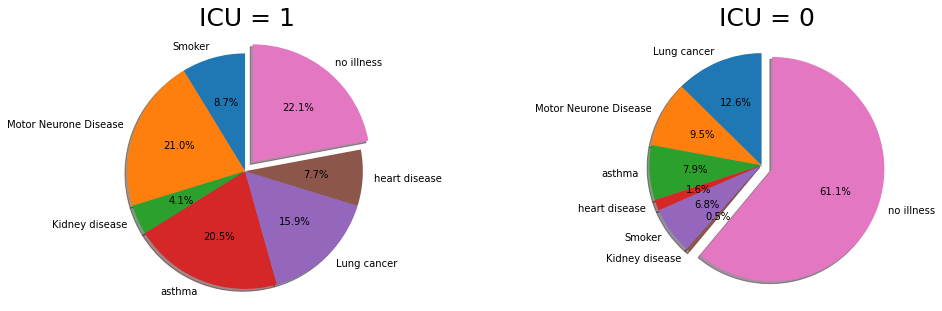

In [6]:
# check which of them are more common in ICU patients. give numbers to them based on that

ICU_patients = data.query('ICU == 1 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(ICU_patients)
fig, ax = plt.subplots(1, 2)
ax[0].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('ICU = 1', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal') 

Healthy_patients = data.query('ICU == 0 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(Healthy_patients)
ax[1].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('ICU = 0', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

<br><p style="font-size:20px; text-align: right;line-height:30px;" >
همانطور که مشاهده میشود بیشتر از نصف افرادی که در آی سی یو بستری نشده اند هیچ بیماری زمینه ای نداشته اند. همچنین 3 عدد از پرشیوع ترین بیماری ها در افرادی که در 
آی سی یو بستری شده اند به ترتیب زیر اند<br>
    Motor Neurone Disease, asthma, Lung Cancer <br>
    حال میخواهیم ببینیم میزان بستری شدن افراد در آی سی یو در این 3 بیماری زمینه ای خاص به چه صورتی است
</p>

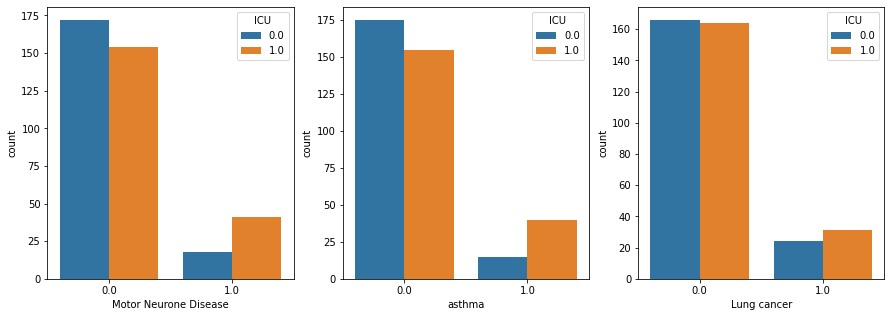

In [7]:
diseases_to_plot = ["Motor Neurone Disease", "asthma", "Lung cancer"]
tags = data["tags"].fillna("")


temp_frame = pd.DataFrame()
for i, row in data.iterrows():
    if i % 5 == 4:
        r = {}
        r["ICU"] = row["ICU"] 
        if isinstance(row["tags"], str):
            for disease in diseases_to_plot:
                r[disease] = 1 if disease in row["tags"] else 0
            temp_frame = temp_frame.append(pd.Series(r), ignore_index=True)
        else:
            for disease in diseases_to_plot:
                r[disease] = 0
            temp_frame = temp_frame.append(pd.Series(r), ignore_index=True)

fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(15,5))
col = 0
for disease in diseases_to_plot:
    sns.countplot(x=disease, hue="ICU", data=temp_frame, ax = axes[col])
    col += 1

<br><p style="font-size:20px; text-align: right;line-height:30px;" >
همانطور که مشاهده میشود در هر هر گروه بیماری افرادی که بیماری را ندارند به نسبت یکسانی در آی سی یو بستری شده اند اما در دو گروه آسم و بیماری نورون حرکتی تعداد افراد 
    بستری شده در آی سی یو این بیماری بیش از 2 برابر افراد بستری نشده است. همچنین به نظر میرسد که سرطان ریه تاثیر خاصی در بستری شدن فرد در آی سی یو ندارد
</p>

<br><p style="font-size:20px; text-align: right;line-height:30px;" >از ابتدای شیوع کرونا تا به حال گمانه زنی های زیادی درباره میزان کشندگی کرونا وجود
    داشته است. شاید نسبت افراد بستری شده در آی سی یو نسبت به کل مراجعین به بیمارستان معیار خوبی برای کشندگی این ویروس نباشد اما میتواند شهود خوبی نسبت به قدرت آن به ما بدهد<br>
    نمودار زیر نسبت افراد بستری شده در آی سی یو را نسبت به کل مراجعین در یک نمودار دایره ای نشان میدهد
</p>

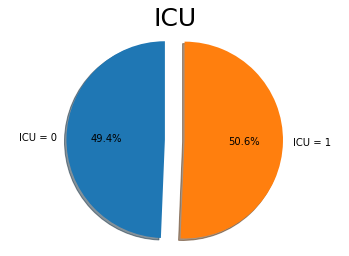

In [8]:
ICU_patients = [data.query('ICU == 0 and WINDOW == "ABOVE_12"').shape[0], 
                data.query('ICU == 1 and WINDOW == "ABOVE_12"').shape[0]]
fig, ax = plt.subplots(1)
ax.pie(ICU_patients, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.set_title('ICU', fontsize=25, fontname="DejaVu Sans")
ax.axis('equal') 
plt.show()

<br><p style="font-size:20px; text-align: right;line-height:30px;" >همانطور که مشاهده میشود تقریبا نصف افرادی که به بیمارستان مراجعه میکنند در آی سی یو بستری میشوند<br></p>

<br><p style="font-size:20px; text-align: right;line-height:30px;" >
سوال دیگری که ممکن است پیش بیاید این است که ایا جنسیت افراد در میزان مقابله آنها به این ویروس تاثیر گذار است یا خیر. از این جهت در دو نمودار نسبت افراد بستری شده در آی سی یو را برای هر یک جنسیت ها بررسی میکنیم
</p>

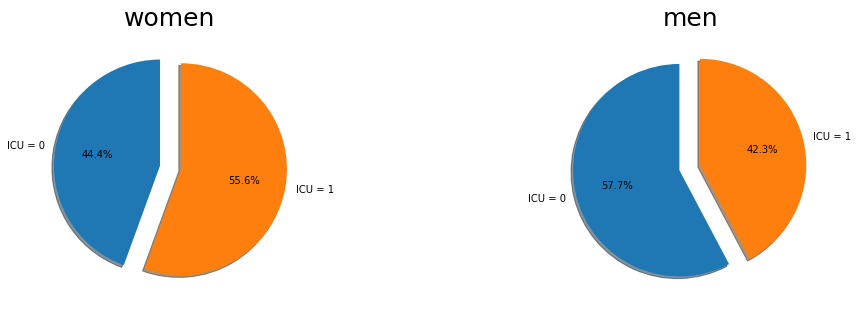

In [9]:
women_to_ICU = [data.query('ICU == 0 and GENDER == 0 and WINDOW == "ABOVE_12"').shape[0], 
                data.query('ICU == 1 and GENDER == 0 and WINDOW == "ABOVE_12"').shape[0]]
men_to_ICU = [data.query('ICU == 0 and GENDER == 1 and WINDOW == "ABOVE_12"').shape[0], 
              data.query('ICU == 1 and GENDER == 1 and WINDOW == "ABOVE_12"').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(women_to_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('women', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(men_to_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('men', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

<br><p style="font-size:20px; text-align: right;line-height:30px;" >
همانطور که مشاهده میشود درصد افراد بستری شده در آی سی یو در مردان نزدیک به 13 درصد کمتر از همین نسبت در زنان است که نشان میدهد مقاومت مردان در مقابل این بیماری کمی بیشتر از زنان است
</p>

<br><p style="font-size:20px; text-align: right;line-height:30px;">
یکی دیگر از باورهای عمومی راجع به کرونا این است که بیشتر گریبان گیر افراد سن بالا میشود و برای جوانان و میانسالان خطر جدی ای ندارد. برای بررسی این مورد نسبت افراد بستری شده در آی سی یو را در دو گروه بالای 65 سال و زیر 65 سال توسط نمودار دایره ای بررسی میکنیم 
</p>

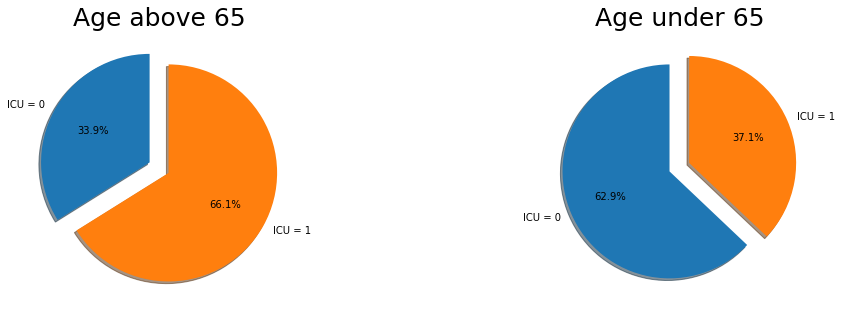

In [10]:
old_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 1 and WINDOW == "ABOVE_12"').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 1 and WINDOW == "ABOVE_12"').shape[0]]
young_age_ICU = [data.query('ICU == 0 and AGE_ABOVE65 == 0 and WINDOW == "ABOVE_12"').shape[0], data.query('ICU == 1 and AGE_ABOVE65 == 0 and WINDOW == "ABOVE_12"').shape[0]]

fig, ax = plt.subplots(1, 2)
ax[0].pie(old_age_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('Age above 65', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal')      
ax[1].pie(young_age_ICU, explode=[0.1, 0.1] , labels=["ICU = 0", "ICU = 1"], autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Age under 65', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

# sns.countplot(x="AGE_ABOVE65", hue="ICU", data=data);

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    خوب به نظر میرسد این باور عمومی ریشه علمی نیز دارد! همانطور که مشاهده میشود نسبت افراد بستری شده در آی سی یو در افراد مسن حدود 30 درصد بیشتر از افراد دیگر است که نشان میدهد این ویروس برای این افراد خطرناک تر است
</p>

<br><p style="font-size:20px; text-align: right;line-height:30px;">
همچنین در داده ها ستونی به اسم<br>
    OTHER<br>
    داریم. خوب است نگاهی به میزان تاثیر این ستون در بستری شدن افراد در آی سی نیز داشته باشیم
</p>

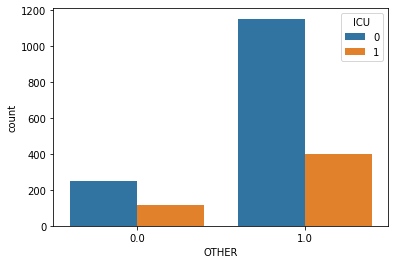

In [11]:
sns.countplot(x="OTHER", hue="ICU", data=data);

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    قسمت جداناپذیر همه دیتاست ها خانه های خالی هستند و این دیتاست نیز استثنا نیست. ابتدا نگاهی به تعداد خانه های خالی هر ستون بندازیم
</p>

In [12]:
print("#NA     #COLUMN: \n")
nas = data.isna().sum()
print(nas.value_counts())

#NA     #COLUMN: 

1104    180
685      18
0         6
686       6
694       6
748       6
5         3
1415      1
dtype: int64


<br><p style="font-size:20px; text-align: right;line-height:30px;">
همانطور که مشاهده میشود از 226 ستون موجود 180 ستون دارای 1104 خانه خالی (حدود 60 درصد) هستند که تعداد بسیار زیادی است<br>
    همچنین مقادیر دیگر خانه های خالی و تعداد ستون هایی که آن تعداد خانی خالی دارند نیز نمایش داده شده است
</p>

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    حال در داده ها به دنبال ستون های تکراری میخواهیم بگردیم. مقادیر بعضی از ستون ها کاملا مطابق یکدیگرند و برای ما سودی ندارند ازین جهت پیدا کردن و حذف آنها کار بسیار خوبی است
</p>

In [13]:
duplicated = data.T.duplicated()
duplicated_cols = data.columns[duplicated].tolist()
duplicated_cols

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'HEMOGLOBIN_DIFF',
 'INR_MEAN',
 'INR_MIN',
 'IN

<p style="font-size:20px; text-align: right;line-height:30px;">
نام ستون های تکراری را در قسمت بالا مشاهده میکنید. البته برای هر یک از گروه های تکراری یک از ستون ها را از لیست حذف کرده ایم که بعدا هنگام حذف این ستون ها از دیتاست دچار مشکل نشویم
</p>

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    همچنین در این دیتاست ستون هایی با مقادیر ثابت نیز وجود دارد. این ستون ها فقط حاوی یک مقدار ثابت اند. در لیست زیر نام این ستون ها را مشاهده میکنید
</p>

In [14]:
constant_cols = data.columns[data.nunique() <= 1].tolist()
constant_cols

['ALBUMIN_DIFF',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_DIFF',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_DIFF',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_DIFF',
 'PLATELETS_DIFF',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_DIFF',
 'SODIUM_DIFF',
 'TGO_DIFF',
 'TGP_DIFF',
 'TTPA_DIFF',
 'UREA_DIFF',
 'DIMER_DIFF']

<br><p style="font-size:20px; text-align: right;line-height:30px;">
همانطور که مشاهده شد این دیتاست دارای ستون های زیادی است و بعید به نظر میرسد که همه این ستون ها در بستری شدن فرد در آی سی یو تاثیرگذار باشند. از این جهت برای پیدا کردن ستون های نامرتبط با ستون آی سی یو از کوریلیشن آنها استفاده میکنیم
</p>

In [15]:
not_correlated_to_ICU_columns = (data.corr()["ICU"][abs(data.corr()["ICU"])  < 0.05 ]).keys().tolist()
not_correlated_to_ICU_columns.remove('PATIENT_VISIT_IDENTIFIER')
not_correlated_to_ICU_columns

['IMMUNOCOMPROMISED',
 'OTHER',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'GLUCOSE_MEDIAN',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'P02_ARTERIAL_MEDIAN',
 'P02_ARTERIAL_MEAN',
 'P02_ARTERIAL_MIN',
 'P02_ARTERIAL_MAX',
 'PC02_ARTERIAL_MEDIAN',
 'PC02_ARTERIAL_MEAN',
 'PC02_ARTERIAL_MIN',
 'PC02_ARTERIAL_MAX',
 'PCR_MEDIAN',
 'PCR_MEAN',
 'PCR_MIN',
 'PCR_MAX',
 'PH_ARTERIAL_MEDIAN',
 'PH_ARTERIAL_MEAN',
 'PH_ARTERIAL_MIN',
 'PH_ARTERIAL_MAX',
 'DIMER_MEDIAN',
 'DIMER_MEAN',
 'DIMER_MIN',
 'DIMER_MAX',
 'HEART_RATE_MEAN',
 'OXYGEN_SATURATION_MEAN',
 'HEART_RATE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN']

<p style="font-size:20px; text-align: right;line-height:30px;">
در قسمت بالا لیستی از ستون هایی که دارای قدرمطلق کوریلیشن کمتر از 0.05 نسبت به ستون آی سی یو هستند را مشاهده میکنید.<br>
    همچنین در قسمت پایین کوریلیشن هرکدام از این ستون ها را نسبت به آی سی یو مشاهده میکند
</p>

In [16]:
data[not_correlated_to_ICU_columns + ["ICU"]].corr()["ICU"]

IMMUNOCOMPROMISED           0.014357
OTHER                      -0.048225
BILLIRUBIN_MEDIAN           0.028567
BILLIRUBIN_MEAN             0.028567
BILLIRUBIN_MIN              0.028567
BILLIRUBIN_MAX              0.028567
BLAST_MEDIAN                0.018549
BLAST_MEAN                  0.018549
BLAST_MIN                   0.018549
BLAST_MAX                   0.018549
GLUCOSE_MEDIAN             -0.011992
GLUCOSE_MEAN               -0.011992
GLUCOSE_MIN                -0.011992
GLUCOSE_MAX                -0.011992
P02_ARTERIAL_MEDIAN        -0.027632
P02_ARTERIAL_MEAN          -0.027632
P02_ARTERIAL_MIN           -0.027632
P02_ARTERIAL_MAX           -0.027632
PC02_ARTERIAL_MEDIAN        0.048973
PC02_ARTERIAL_MEAN          0.048973
PC02_ARTERIAL_MIN           0.048973
PC02_ARTERIAL_MAX           0.048973
PCR_MEDIAN                  0.025703
PCR_MEAN                    0.025703
PCR_MIN                     0.025703
PCR_MAX                     0.025703
PH_ARTERIAL_MEDIAN          0.026004
P

<br><p style="font-size:20px; text-align: right;line-height:30px;">
در صورت بالا بودن کوریلیشن بین دو ستون استفاده از یکی از آنها تفاوت چندانی با استفاده از هردوی آنها ندارد. ازین جهت ستون هایی که کوریلیشن بالایی با یکدیگر دارند را نیز پیدا میکنیم<br>
    لیست زیر ستون هایی که دارای قدرمطلق کوریلیشن بالای 0.95 اند را نشان میدهد 
</p>

In [17]:
correlated_cols = abs(data.corr()) > 0.95
correlated_columns = []
cols = correlated_cols.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if correlated_cols.loc[cols[i], cols[j]]:
            correlated_columns.append((cols[i], cols[j]))
correlated_columns

[('ALBUMIN_MEDIAN', 'ALBUMIN_MEAN'),
 ('ALBUMIN_MEDIAN', 'ALBUMIN_MIN'),
 ('ALBUMIN_MEDIAN', 'ALBUMIN_MAX'),
 ('ALBUMIN_MEAN', 'ALBUMIN_MIN'),
 ('ALBUMIN_MEAN', 'ALBUMIN_MAX'),
 ('ALBUMIN_MIN', 'ALBUMIN_MAX'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MIN'),
 ('BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MAX'),
 ('BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN'),
 ('BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MAX'),
 ('BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MIN'),
 ('BE_VENOUS_MEDIAN', 'BE_VENOUS_MAX'),
 ('BE_VENOUS_MEAN', 'BE_VENOUS_MIN'),
 ('BE_VENOUS_MEAN', 'BE_VENOUS_MAX'),
 ('BE_VENOUS_MIN', 'BE_VENOUS_MAX'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MIN'),
 ('BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MAX'),
 ('BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN'),
 ('BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MAX'),
 ('BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX'),
 ('BIC_VENOUS_MEDIAN', 'BIC_

<br><p style="font-size:40px; text-align: right;" ><b>Feature Engineering</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
    برای فهمیدن بهتر داده توسط ماشین باید داده ها را عددی کنیم.<br>
    برای این کار ابتدا ستون های غیر عددی را پیدا میکنیم
</p>

In [18]:
data.select_dtypes('object').columns

Index(['AGE_PERCENTIL', 'WINDOW', 'tags'], dtype='object')

<br><p style="font-size:20px; text-align: right;line-height:30px;">
در ابتدا ستون مربوط به بیماری ها را به یک ستون عددی تبدیل میکنیم. همانطور که مشاهده شد بعضی بیماری ها از دیگر بیماری ها خطرناک تر بودند و بعضی نیز تاثیرگذاریشان مانند یکدیگر بود. ازین جهت بیماری ها را بصورت زیر تقسیم میکنیم <br>
    اگر فردی یک از بیماری های نورون حرکتی, سرطان ریه یا آسم را داشت به آن عدد 3 را میدهیم<br>
    اگر فردی بیماری قلبی داشت یا سیگار میکشید به آن عدد 2 را میدهیم<br>
    اگر فردی بیماری کلیوی داشت به آن عدد 1 را میدهیم<br>
    و در غیر این صورت عدد 0 را به آن میدهیم
</p>

In [19]:
data["tags"] = data["tags"].apply(lambda x: 0 if not isinstance(x, str) else (3 if any(disease in x.split(', ') for disease 
                                  in ['Motor Neurone Disease', 'Lung cancer', 'asthma']) else (2 if any(disease in x.split(', ') for disease 
                                  in ['Smoker', 'heart disease']) else  1)))
data["tags"]

0       3
1       3
2       3
3       3
4       3
       ..
1920    0
1921    0
1922    0
1923    0
1924    3
Name: tags, Length: 1925, dtype: int64

<br><p style="font-size:20px; text-align: right;line-height:30px;">
ستون دیگری که لازم است آنرا عددی کنیم ستون رده سنی است. برای اینکار رده سنی زیر 10 سال را به 1, رده سنی بین 10 تا 20 را با 2 و ... نشان میدهیم. همچنین افراد بالای همه افراد بالای 90 سال را نیز با 10 نشان میدهیم 
</p>

In [20]:
# data["OXYGEN_SATURATION_DIFF"].value_counts()
# data["AGE_PERCENTIL"].unique()
data["AGE_PERCENTIL"] = data["AGE_PERCENTIL"].apply(lambda x: 10 if "Above" in x else int(x[0]))
data["AGE_PERCENTIL"].value_counts()

2     215
1     205
3     205
4     200
7     195
5     190
8     190
6     185
10    185
9     155
Name: AGE_PERCENTIL, dtype: int64

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    برای تبدیل پنجره های زمانی به عدد نیز آنها را به ترتیب با اعداد 1 تا 5 نمایش میدهیم
</p>

In [21]:
data["WINDOW"] = data["WINDOW"].apply(lambda x: 5 if "ABOVE" in x else int(int(x[0])/2 + 1))
data["WINDOW"].value_counts()

1    385
2    385
3    385
4    385
5    385
Name: WINDOW, dtype: int64

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    همانطور که در قسمت قبل مشاهده شد نیاز است تا تعداد زیادی از ستون ها را که نیازی به آنها نداریم را حذف کنیم. ابتدا با ستون هایی که یک مقدار ثابت دارند شروع میکنیم 
</p>

In [22]:
# Drop columns with constant value (same value for all rows)
data.drop(columns = constant_cols, inplace=True)

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    حال ستون هایی تکراری را پیدا میکنیم و از هر گروه تکراری یکی را نگه داشته و بقیه را حذف میکنیم
</p>

In [23]:
# drops duplicate columns. keeps one of the duplicate columns of each group
data = data.T.drop_duplicates().T

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    ستون هایی که تعداد زیادی مقدار نا معلوم دارند اکثر اوقات کارایی خاصی ندارند. اما در این پروژه بعضی از ستون ها با اینکه تعداد خانه نامعلوم زیادی دارند ولی تاثیر خوبی در نتایج دارند به همین دلیل این ستون ها را فعلا نگه میداریم
</p>

In [24]:
# remove columns with more than 0.5 null ratio
# data.dropna(axis=1, how="any", thresh=data.shape[0] * 0.5, subset=None, inplace=True)

<br><p style="font-size:20px; text-align: right;line-height:30px;">
  حال این سوال پیش میاید که خانه های خالی باقی مانده رو چگونه پر کنیم. برای این کار ابتدا هر بیماری که مراجعه کرده را بررسی میکنیم. این بیمار ممکن است در پنجره های زمانی مختلف دارای خانه های خالی مختلف باشد. این خانه خالی را با استفاده از میانگین آن ستون برای آن بیمار پر میکنیم <br>
    همچنین ممکن است یک ستون برای یک بیمار کاملا خالی باشد که در این صورت روش بالا همه خانه های خالی را پر نمیکند. از این جهت پس از اجرای روش بالا خانه های خالی باقی مانده از هرستون را با استفاده از میانگین آن ستون روی همه بیماران پر میکنیم
</p>

In [25]:
for patient_id in data['PATIENT_VISIT_IDENTIFIER'].unique():
    patient_data = data[data["PATIENT_VISIT_IDENTIFIER"] == patient_id]
    patient_data.fillna(patient_data.mean(), inplace = True)
    data.loc[patient_id*5:patient_id * 5+ 4, :] = patient_data

In [26]:
data = data.fillna(value=data.mean(skipna = True))

<br><p style="font-size:20px; text-align: right;line-height:30px;">
حال وقت آن است که ستون هایی که کوریلیشن بسیار پایینی با ستون آی سی یو داشتند و در مراحل قبل بدست آوردیم را حذف کنیم
</p>

In [27]:
for col in not_correlated_to_ICU_columns:
    if col in data.columns:
        data.drop(col, axis=1, inplace = True)

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    در اخر نیز میدانیم که داده بیماران تا زمانی که بستری نشده اند ارزشمند است و میتوان برای مدل کردن از آن استفاده کرد اما با مقایسه نتایج حاصل از تمرین داده ها همراه داده های آی سی یو و بدون آن به این نتیجه رسیدیم که مدل ها نتیجه بهتری میدهند وقتی این داده ها نیز درنظر گرفته شوند. همچنین نیاز است ستون آی سی یو ردیف هایی از یک بیمار که در آخر در آی سی یو بستری میشود همه 1 شوند
</p>

<img src="ICU1.PNG">

<img src="ICU2.PNG">

In [28]:
final_data = pd.DataFrame()
for i, row in data.iterrows():
#     if row["ICU"] == 0:
    temp_r = row.copy()
    temp_r["ICU"] = data.loc[i  - i % 5 + 4]["ICU"]
    final_data = final_data.append(temp_r, ignore_index = True)
final_data.drop(columns = ["PATIENT_VISIT_IDENTIFIER"], inplace = True)
final_data

,AGE_ABOVE65,AGE_PERCENTIL,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_DIASTOLIC_MAX,...,TEMPERATURE_MAX,TEMPERATURE_MEAN,TEMPERATURE_MEDIAN,TEMPERATURE_MIN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,WINDOW,tags
0,1.0,6.0,0.302632,-0.935829,-0.931937,-0.317073,-0.365854,-1.000000,-1.000000,-0.247863,...,-0.420290,-0.285714,-0.285714,0.208791,-0.998134,-0.987424,-0.836123,-0.836145,1.0,3.0
1,1.0,6.0,0.302632,-0.935829,-0.931937,-0.317073,-0.365854,-1.000000,-1.000000,-0.076923,...,0.246377,0.535714,0.535714,0.714286,-0.998134,-0.987424,-0.836123,-0.836145,2.0,3.0
2,1.0,6.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.779710,-0.796656,-0.133903,...,-0.021739,0.044159,0.044643,0.335165,-0.997201,-0.990854,-0.825613,-0.836145,3.0,3.0
3,1.0,6.0,0.302632,-0.935829,-0.931937,-0.317073,-0.365854,-0.779710,-0.796656,-0.133903,...,-0.275362,-0.107143,-0.107143,0.318681,-0.998134,-0.987424,-0.836123,-0.836145,4.0,3.0
4,1.0,6.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.339130,-0.389967,-0.076923,...,0.362319,0.033779,0.035714,0.098901,-0.999067,-0.983994,-0.846633,-0.836145,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.0,5.0,0.605263,-1.000000,-0.858639,-0.317073,-0.243902,-1.000000,-1.000000,-0.299145,...,0.246377,0.535714,0.535714,0.714286,-0.997574,-0.992188,-0.857921,-0.843373,1.0,0.0
1921,0.0,5.0,0.605263,-1.000000,-0.717277,-0.317073,-0.170732,-1.000000,-1.000000,-0.247863,...,-0.072464,0.142857,0.142857,0.472527,-0.997387,-0.992378,-0.869210,-0.879518,2.0,0.0
1922,0.0,5.0,0.605263,-1.000000,-0.858639,-0.317073,-0.243902,-1.000000,-1.000000,-0.247863,...,-0.072464,0.142857,0.142857,0.472527,-0.997574,-0.992188,-0.857921,-0.843373,3.0,0.0
1923,0.0,5.0,0.605263,-1.000000,-0.858639,-0.317073,-0.243902,-1.000000,-1.000000,-0.162393,...,0.043478,0.285714,0.285714,0.560440,-0.997574,-0.992188,-0.857921,-0.843373,4.0,0.0


<br><p style="font-size:20px; text-align: right;line-height:30px;">
    در قسمت زیر نیز میتوانید هیت مپ ستون های دیتاست نهایی را مشاهده کنید
</p>

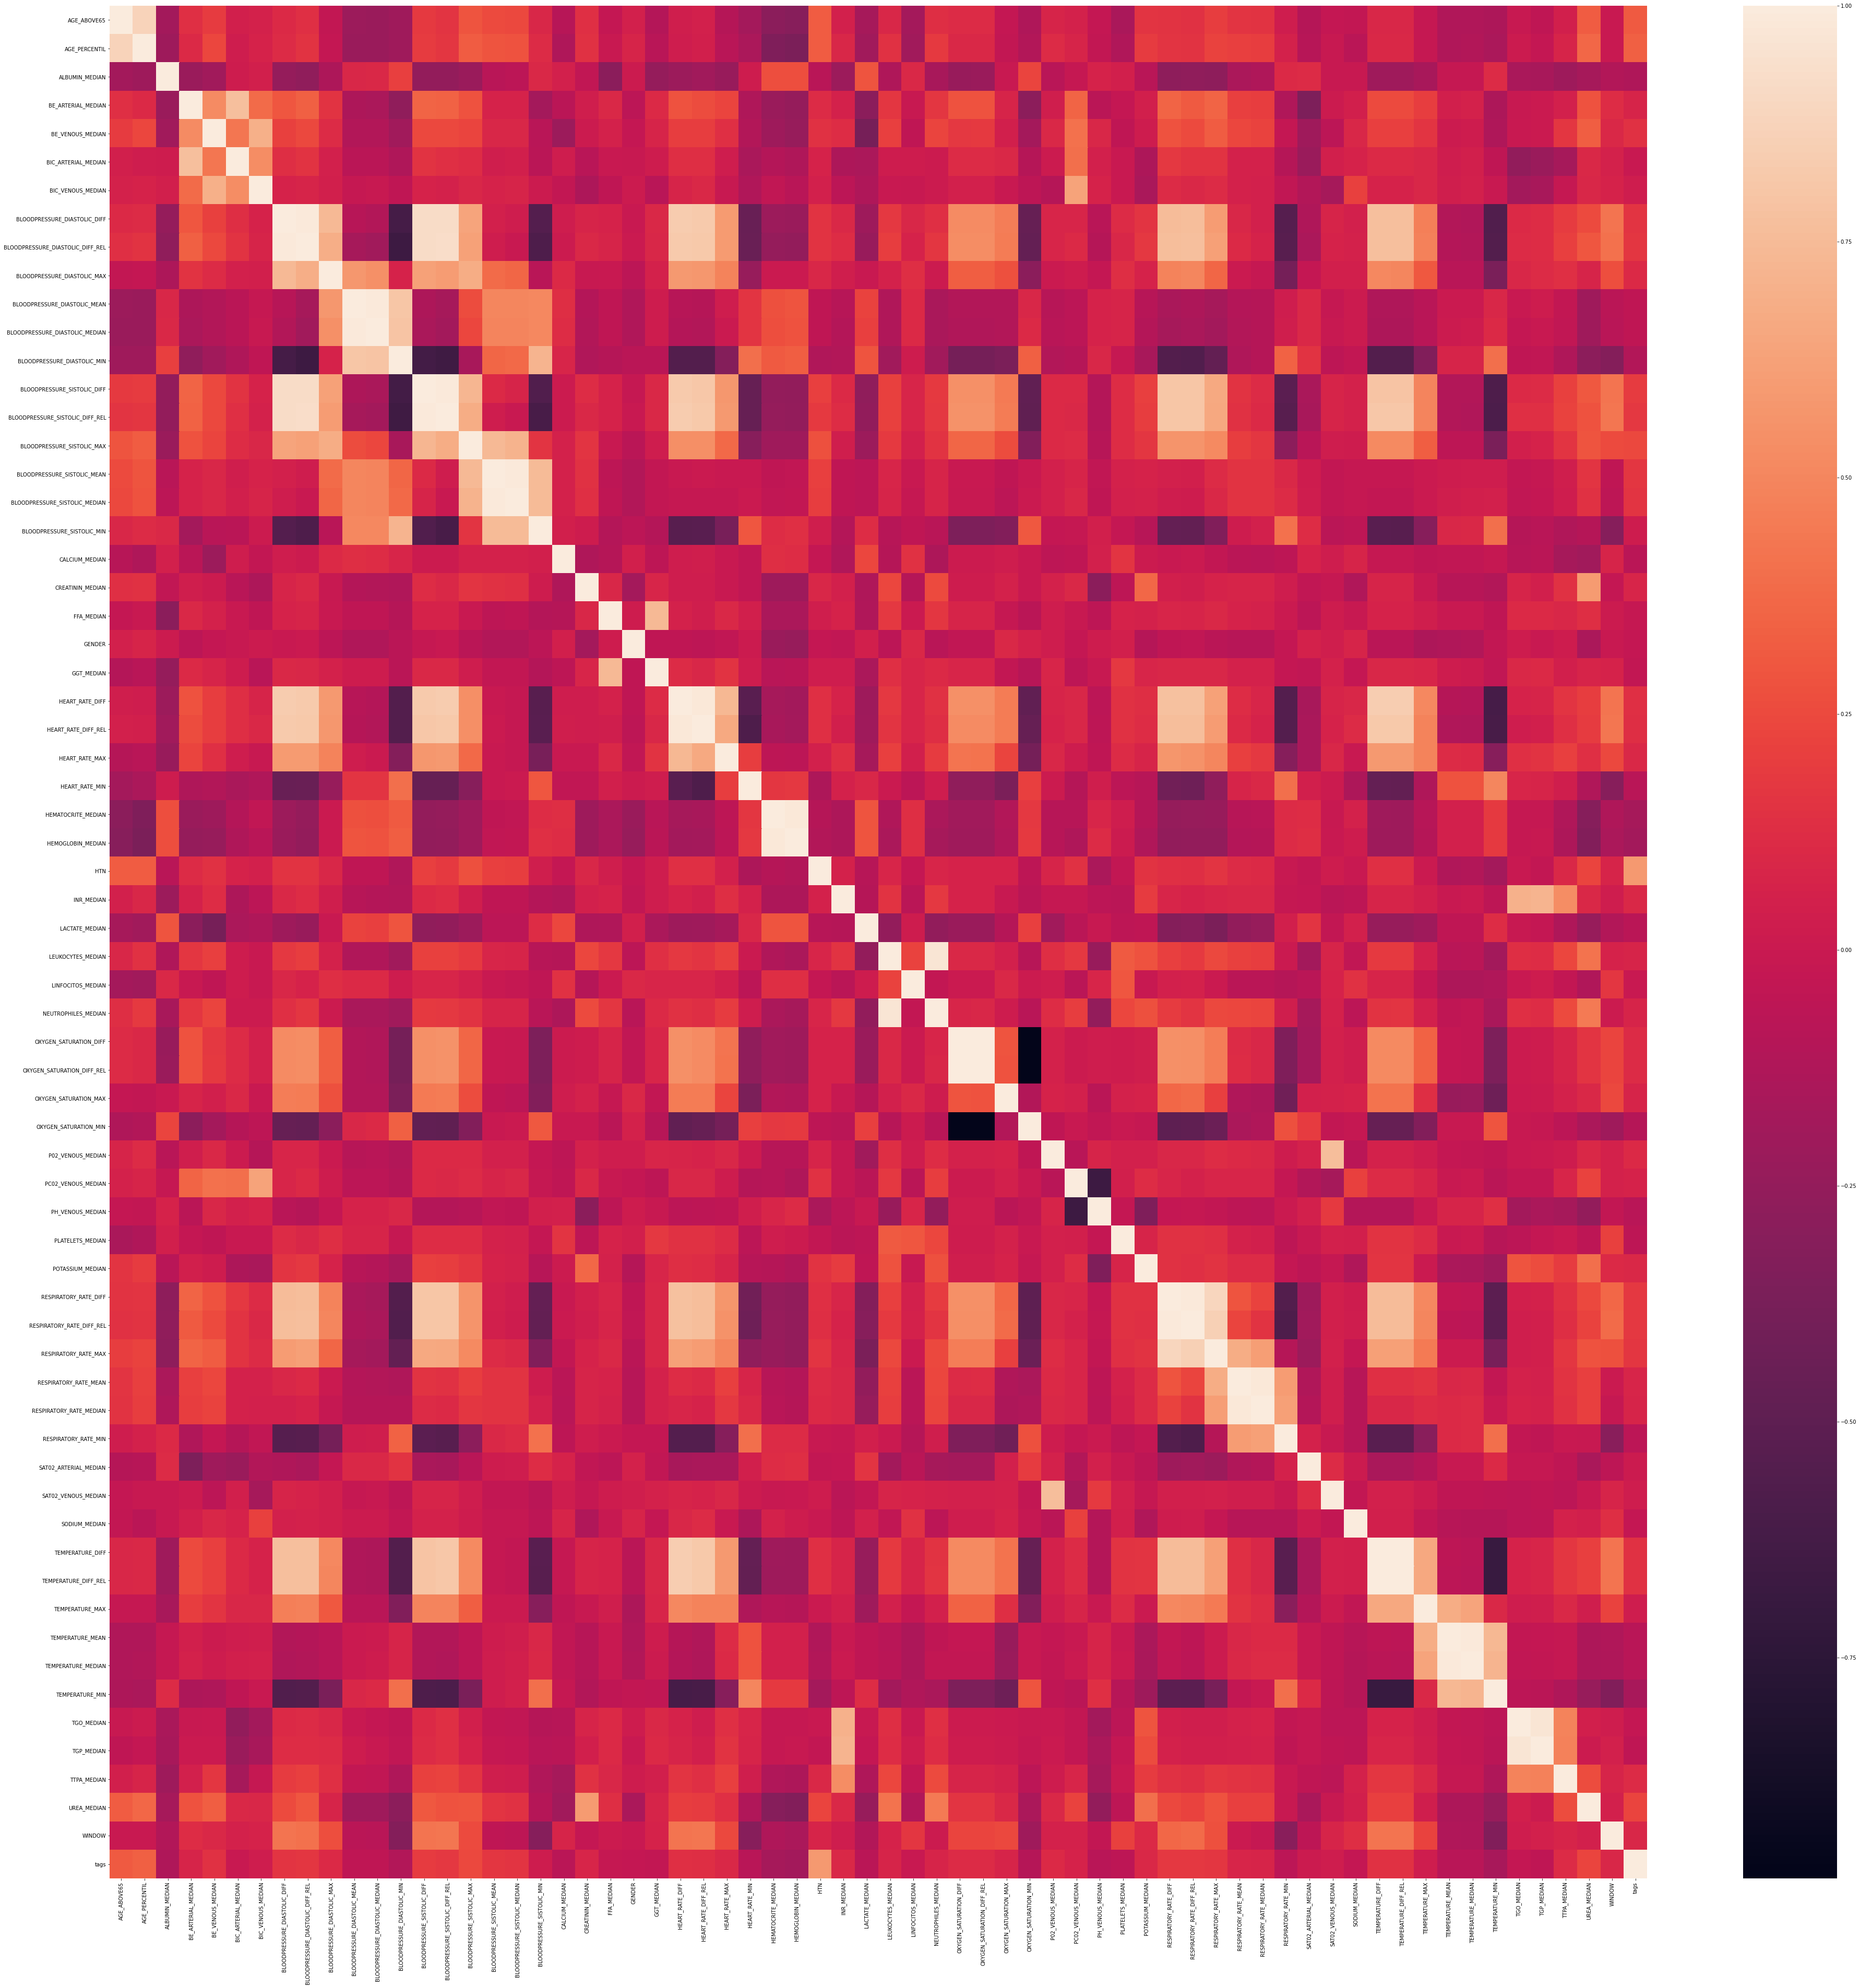

In [29]:
f,ax = plt.subplots(figsize=(66,66))
sns.heatmap(final_data.drop(columns=['ICU']).corr())
plt.show()

<br><p style="font-size:20px; text-align: right;line-height:30px;">
     برای داده بعضی از مدل ها نیاز داریم که داده ها نیاز داریم که ستون های داده نرمال شده باشند. قطعه کد زیر این امر را انجام میدهد 
</p>

In [30]:
X, Y = np.array(final_data.copy().drop(columns = ["ICU"])), np.array(final_data.copy()["ICU"])
transformer = Normalizer().fit(X)  # fit does nothing.
X_normalized = transformer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=0)

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    برای ترین کردن مدل هایی مانند نایو بیز نیاز داریم که ستون های داده را دودویی کنیم. بدین منظور از میانگین ستون ها در هر ستون استفاده میکنیم و مقادیری که بیشتر از آن است را برابر 1 میگیریم
</p>

In [31]:
X_binary, Y = np.array(final_data.drop(columns=["ICU"], inplace = False)), np.array(final_data["ICU"])
transformer = Binarizer(threshold = [np.mean(X_binary[:, j]) for j in range(X_binary.shape[1])]).fit(X_binary)
X_binary = transformer.transform(X_binary)
X_train_binary, X_test_binary, Y_train_binary, Y_test_binary = train_test_split(X_binary, Y, test_size=0.2, random_state=0)

<br><p style="font-size:20px; text-align: right;line-height:30px;">
    برای مدل هایی نظیر درخت تصمیم و جنگل تصادفی نیز نیاز داریم ستون های پیوسته را به ستون های گسسته تبدیل کنیم. در قطعه کد زیر هر کدام از ستون هایی که بیش از 10 مقدار متفاوت دارند را ابتدا مرتب کرده و سپس به 10 قسمت مساوی تقسیم میکنیم
    
</p>

In [32]:
data_discrete = final_data.copy()
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
for col in data_discrete.columns:
    if len(data_discrete[col].unique()) > 10:
        data_discrete[col] = est.fit_transform(np.array(data_discrete[col]).reshape(len(data_discrete[col]), 1))     
X_train_discrete, X_test_discrete, Y_train_discrete, Y_test_discrete = train_test_split(
                                                    np.array(data_discrete.drop(columns=["ICU"], inplace = False)),
                                                    np.array(data_discrete["ICU"]), test_size=0.2, random_state=0)

<br><p style="font-size:40px; text-align: right;" ><b>testing models</b></p>

<br><br><p style="font-size:20px; text-align: right;line-height:30px;">
در این قسمت میخواهیم به تست کردن مدل های مختلف بپردازیم. برای هرکدام از مدل ها معیار های دقت ریکال و معیار اف-1 را بدست بیاوریم و همچنین ماتریس درهم ریختگی آن را بدست بیاوریم</p>

<br><p style="font-size:20px; text-align: right;" ><b>SVM</b></p>

<br><br><p style="font-size:20px; text-align: right;line-height:30px;">
در ابتدا دسته بند اس وی ام را امتحان میکنیم. بهترین تنظیمات پیدا شده برای این دسته بند با تست حالت های مختلف کرنل برابر آر بی اف بود 
</p>

precision = 0.9157894736842105	 recall = 0.87	 f1 = 0.8923076923076922


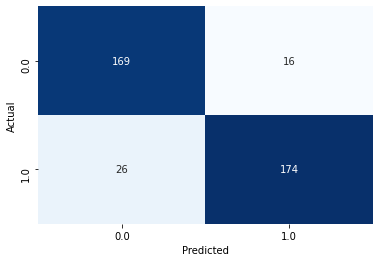

In [33]:
SVM_clf = make_pipeline(StandardScaler(), svm.SVC(gamma='scale', kernel="rbf"))
SVM_clf.fit(X_train, Y_train)
y_pred = SVM_clf.predict(X_test)
precision, recall, f1 = precision_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred)
print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar = False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    همانطور که مشاهده میشود این دسته بند عملکرد خوبی دارد. توانسته 87 درصد نمونه های مثبت را برگرداند و همچنین دارای دقت 91 درصدی است که در کل باعث میشود امتیاز اف-1 حدود 89 درصد داشته باشد. پس در کل این دسته بند عملکرد قابل قبولی دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Logistic Regression</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
  حال میخواهیم با استفاده از رگرسیون لجستیک دسته بند خود را بسازیم. به این منظور از رگیولارایزیشن ال-2 استفاده میکنیم  
</p>

precision = 0.8393782383419689	 recall = 0.81	 f1 = 0.8244274809160306


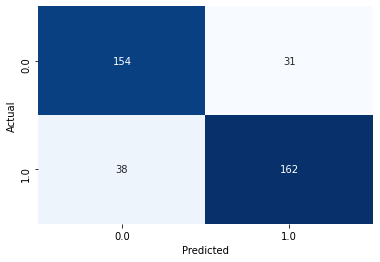

In [34]:
LR_clf = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000).fit(X_train, Y_train)
y_pred = LR_clf.predict(X_test)
precision, recall, f1 = precision_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred)
print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    همانگونه که مشاهده میشود این عملکرد این دسته بند بدتر از دسته بند اس وی ام است و معیار های آن هرکدام تقریبا 10 درصد پایین تر از آن است. این دسته بند با امتیاز حدود 82 عملکرد نسبتا متوسطی دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Gaussian Naive Bayes</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
    یکی از دسته بندهای ساده ای که کارایی زیادی دارد و همچنین دقت خوبی به ما میدهد دسته بند نایو بیز است. در این قسمت از دسته بند گاوسی نایو بیز برای پیش بینی افراد بستری شده در آی سی یو استفاده میکنیم 
</p>

precision = 0.7357512953367875	 recall = 0.71	 f1 = 0.7226463104325699


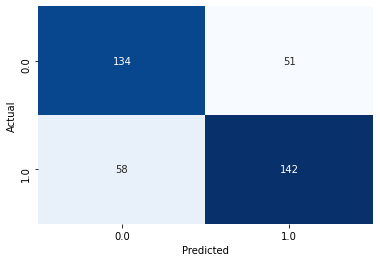

In [35]:
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(X_train, Y_train)
y_pred = GaussianNB_clf.predict(X_test)
precision, recall, f1 = precision_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    دسته بند نایو بیز گاوسی روی این دیتاست عملکرد جالبی ندارد. همانطور که مشاهده میشود همه معیار های این دسته بند حدود 71 است که چندان قابل قبول نیست و نسبت به دسته بند های قبلی عملکرد ضعیفی دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Bernoulli Naive Bayes</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
حال با استفاده از داده دودویی بدست امده مدل نایو بیز برنولی خود را ترین و تست میکنیم
</p>

precision = 0.8604651162790697	 recall = 0.74	 f1 = 0.7956989247311828


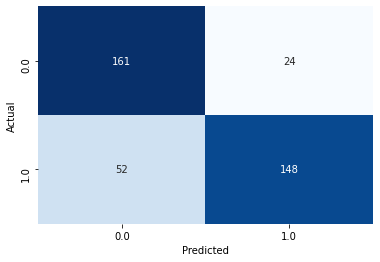

In [36]:
BernoulliNB_clf = BernoulliNB()
BernoulliNB_clf.fit(X_train_binary, Y_train_binary)
y_pred = BernoulliNB_clf.predict(X_test_binary)
precision, recall, f1 = precision_score(Y_test_binary, y_pred), recall_score(Y_test_binary, y_pred), f1_score(Y_test_binary, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test_binary, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    دسته بند نایو بیز برنولی نسبت به مدل گاوسی آن عملکرد بهتری دارد و با اینکه ریکال آن تفاوت چندانی ندارد اما دقت آن حدود 13 درصد بهتر است که آن را در کل دسته بند بهتری نسبت به مدل گاوسی آن میکند اما در مجموع عملکرد نسبتا ضعیفی دارد 
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Desicion Tree</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
حال سعی میکنیم با استفاده از یک درخت تصمیم داده ها را ترین کنیم
</p>

precision = 0.8601036269430051	 recall = 0.83	 f1 = 0.8447837150127224


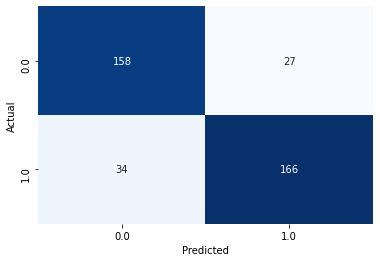

In [37]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_discrete, Y_train_discrete)
y_pred = clf.predict(X_test_discrete)
precision, recall, f1 = precision_score(Y_test_discrete, y_pred), recall_score(Y_test_discrete, y_pred), f1_score(Y_test_discrete, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test_discrete, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    همانطور که مشاهده میشود این دسته بند عملکرد بهتری نسبت به مدل های بیز و همچنین رگرسیون لجستیک دارد اما عملکرد آن کمی از دسته بند اس وی ام ضغیف تر است. این مدل با امتیاز اف-1 حدود 84 قابلیت خوبی در برگرداندن نمونه های مثبت نیز دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Random Forest</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
حال که داده مورد نظر اماده شده است با استفاده از جنگل تصادفی آن را ترین و تست میکنیم. برای این مدل انتخاب حداکثر تعداد فیچرها را برعهده خود مدل گذاشتیم و همچنین از معیار آنتروپی برای آن استفاده کرده ایم
</p>

precision = 0.9238578680203046	 recall = 0.91	 f1 = 0.9168765743073047


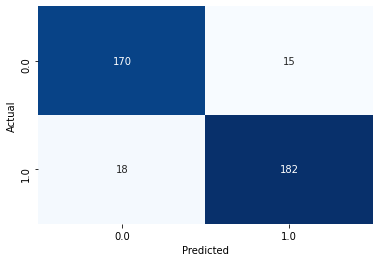

In [38]:
RF_clf = RandomForestClassifier(random_state=0, criterion = "entropy", max_features = "auto", 
                             bootstrap = True, class_weight = "balanced")
RF_clf.fit(X_train_discrete, Y_train_discrete)
y_pred = RF_clf.predict(X_test_discrete)
precision, recall, f1 = precision_score(Y_test_discrete, y_pred), recall_score(Y_test_discrete, y_pred), f1_score(Y_test_discrete, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test_discrete, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    این دسته بند عملکرد خوبی دارد. همانطور که مشاهده میشود عملکرد این دسته بند نسبت به بهترین دسته بند قبلی که اس وی ام است کمی بهتر است و در مجموع عملکرد قابل قبول و خوبی دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>AdaBoost</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
در آخر نیز میخواهیم با استفاده از روش آدابوست داده ها را ترین کنیم. در این مدل از درخت تصمیم به عنوان مدل پایه استفاده شده است. تعداد استیمیتورهای آن را برای مقادیر مختلف امتحان شده و بهترین آن انتخاب شده است. با اقزایش بیشتر تعداد استیمیتورها دقت مدل کاهش میابد 
</p>

precision = 0.9354838709677419	 recall = 0.87	 f1 = 0.9015544041450777


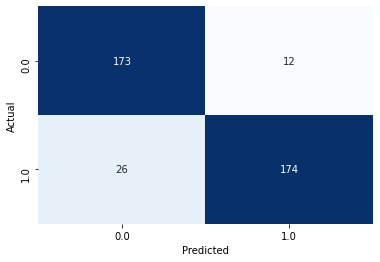

In [39]:
adaBoost_clf = AdaBoostClassifier(n_estimators=140, random_state=0, learning_rate = 1)
adaBoost_clf.fit(X_train_discrete, Y_train_discrete)
y_pred = adaBoost_clf.predict(X_test_discrete)
precision, recall, f1 = precision_score(Y_test_discrete, y_pred), recall_score(Y_test_discrete, y_pred), f1_score(Y_test_discrete, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test_discrete, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    دقت این مدل کمی بهتر از جنگل تصادفی است اما ریکال آن کم تر است که باعث شده معیار اف-1 آن کمتر از مدل جنگل تصادفی شود. این مدل نیز عملکرد خوبی دارد
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Final Model</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
    مدل نهایی را جنگل تصادفی انتخاب میکنیم. این مدل بهترین امتیاز اف-1 را بین تمامی مدل ها داشته است و همچنین عملکرد خوبی روی پنجره زمانی اول دارد. این مدل با استفاده از  بوت استپینگ داده های جدید از روی داده اصلی درست کرده و روی هر کدام یک درخت درست میکند. در آخر نیز برای تصمیم بین تصمیم های درخت های ایجاد شده بیشترین را انتخاب میکند <br>
    در قسمت پایین عملکرد این مدل را روی داده های تست دوباره مشاهده میکنید
</p>

precision = 0.9238578680203046	 recall = 0.91	 f1 = 0.9168765743073047


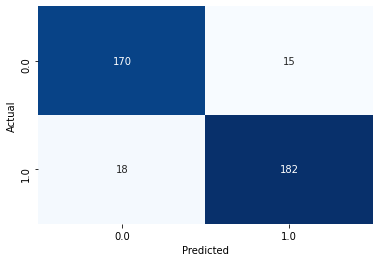

In [40]:
y_pred = RF_clf.predict(X_test_discrete)
precision, recall, f1 = precision_score(Y_test_discrete, y_pred), recall_score(Y_test_discrete, y_pred), f1_score(Y_test_discrete, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(Y_test_discrete, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    حال کمی به مصور سازی میپردازیم. در ابتدا با استفاده از روش های پی سی ای و تی اس ان ئی داده ها را به دو فضای دو بعدی میاوریم
</p>

In [41]:
X_pca = PCA(n_components=2).fit_transform(X_test_binary)
X_tsne = TSNE(n_components=2).fit_transform(X_test_binary)

<p style="font-size:20px; text-align: right;line-height:30px;">
حال لیبل اصلی نقاط را در فضای دو بعدی نمایش میدهیم
</p>

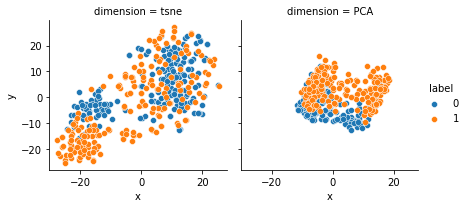

In [42]:
df = pd.DataFrame({'x': X_tsne[:, 0],
                   'y': X_tsne[:, 1],
                   'label': list(map(int, Y_test_binary)),
                   'dimension':"tsne"})
df = df.append(pd.DataFrame({'x': X_pca[:, 0] * 5,
                            'y': X_pca[:, 1] * 5,
                            'label': list(map(int, Y_test_binary)),
                            'dimension':"PCA"}))
sea = sns.FacetGrid(df, col = "dimension", hue = "label")
sea.map(sns.scatterplot, "x", "y")
sea.add_legend();

<p style="font-size:20px; text-align: right;line-height:30px;">
  این نقاط در فضای دو بعدی چندان جداپذیر به نظر نمیرسند<br>
    حال لیبل های پیش بینی شده برای نقاط را مشاهده میکنیم
</p>

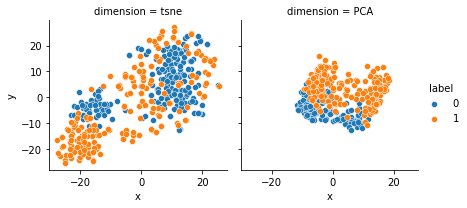

In [43]:
df = pd.DataFrame({'x': X_tsne[:, 0],
                   'y': X_tsne[:, 1],
                   'label': list(map(int, y_pred)),
                   'dimension':"tsne"})
df = df.append(pd.DataFrame({'x': X_pca[:, 0] * 5,
                            'y': X_pca[:, 1] * 5,
                            'label': list(map(int, y_pred)),
                            'dimension':"PCA"}))
sea = sns.FacetGrid(df, col = "dimension", hue = "label")
sea.map(sns.scatterplot, "x", "y")
sea.add_legend()

<p style="font-size:20px; text-align: right;line-height:30px;">
    شباهت بین این اشکال قابل رویت است. 
    شکل زیر نیز نشان میدهد که کدام یک از نقاط درست و کدام نقاط نادرست پیش بینی شده اند
</p>

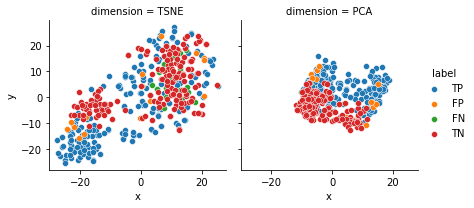

In [44]:
def cal_labels(y_pred, y_act): # returns labels {TP, FP, TN, FN} according to predicted and actual values
    labels = [0] * len(y_pred)
    for i in range(len(labels)):
        if y_pred[i] == 1:
            if y_act[i] == 1:
                labels[i] = "TP"
            else:
                labels[i] = "FP"
        else:
            if y_act[i] == 0:
                labels[i] = "TN"
            else:
                labels[i] = "FN"
    return labels

labels = cal_labels(y_pred ,Y_test_binary)
df = pd.DataFrame({'x': X_tsne[:, 0],
                           'y': X_tsne[:, 1],
                           'label': labels,
                           'dimension':"TSNE"})
df = df.append(pd.DataFrame({'x': X_pca[:, 0] * 5,
                   'y': X_pca[:, 1] * 5,
                   'label': labels,
                   'dimension':"PCA"}))

sea = sns.FacetGrid(df, col = "dimension", hue = "label")
sea.map(sns.scatterplot, "x", "y")
sea.add_legend();


<p style="font-size:20px; text-align: right;line-height:30px;">
همانطور که مشاهده میشود تعداد نقاط قرمز و آبی که نقاط درست پیش بینی شده را نشان میدهد بسیار بیشتر از دیگر نقاط است
</p>

<br><p style="font-size:20px; text-align: right;" ><b>Fueatures Importance</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
حال میخواهیم ببینیم که کدام یک از ستون های موجود در داده نهایی بیشترین تاثیر را روی مدل نهایی دارند. در قطعه کد زیر اهمیت ستون های موجود در داده ها را میگیریم و سپس به ترتیب نمایش میدهیم 
</p>

In [51]:
importances = [(data_discrete.drop(columns="ICU").columns[i], RF_clf.feature_importances_[i]) for i in range(len(RF_clf.feature_importances_))]
importances = sorted(importances, key = lambda x: x[1], reverse = True)
for imp in importances:
    print('{}:\t {}'.format(imp[0], imp[1]))


RESPIRATORY_RATE_MAX:	 0.07324414495112368
RESPIRATORY_RATE_MEDIAN:	 0.05767455518526922
LACTATE_MEDIAN:	 0.05571632787993754
RESPIRATORY_RATE_MEAN:	 0.05212387813891933
RESPIRATORY_RATE_DIFF_REL:	 0.04375007381234633
RESPIRATORY_RATE_DIFF:	 0.03622932457357014
AGE_PERCENTIL:	 0.02660587162477178
BE_VENOUS_MEDIAN:	 0.021678298568131523
RESPIRATORY_RATE_MIN:	 0.021299820680093444
SAT02_VENOUS_MEDIAN:	 0.02040863396181128
BLOODPRESSURE_DIASTOLIC_MIN:	 0.020106745034969915
NEUTROPHILES_MEDIAN:	 0.01869588315710735
UREA_MEDIAN:	 0.017513328351060935
P02_VENOUS_MEDIAN:	 0.016654698230150766
LINFOCITOS_MEDIAN:	 0.01660322713424783
BLOODPRESSURE_DIASTOLIC_MEDIAN:	 0.016447351681848375
BE_ARTERIAL_MEDIAN:	 0.015561007973544538
BLOODPRESSURE_SISTOLIC_MEAN:	 0.015350987723913054
BLOODPRESSURE_DIASTOLIC_MEAN:	 0.01513822918502855
LEUKOCYTES_MEDIAN:	 0.01389458607107394
POTASSIUM_MEDIAN:	 0.013647530647986938
PH_VENOUS_MEDIAN:	 0.013533389106831883
BLOODPRESSURE_SISTOLIC_MEDIAN:	 0.013314138895571

<p style="font-size:20px; text-align: right;line-height:30px;">
   در این قسمت نمودار میله ای میزان اهمیت 10 ویژگی برتر میشاهده میشود  
</p>

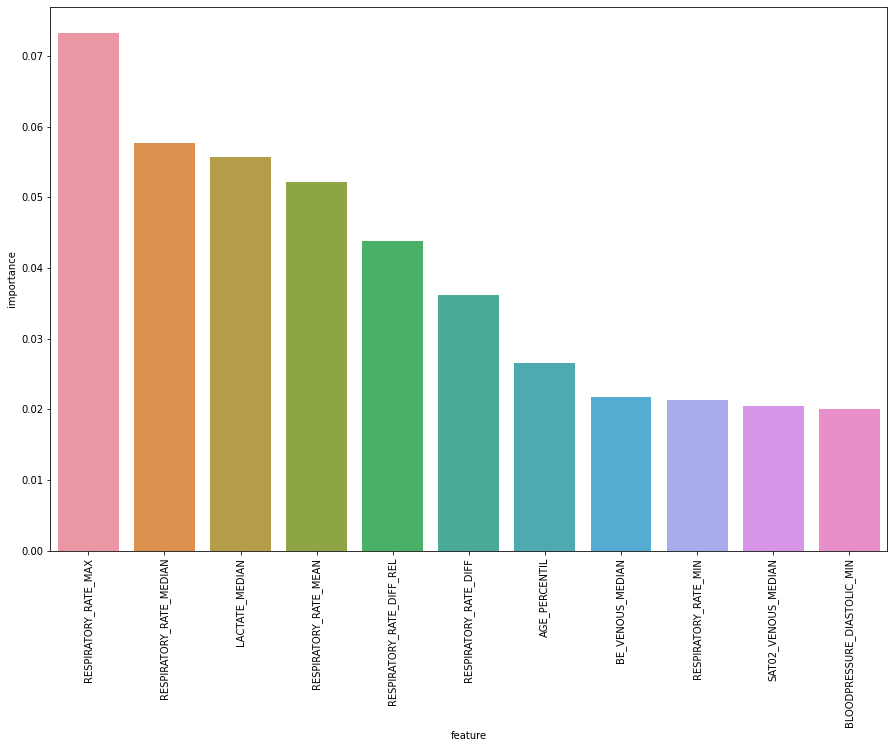

In [46]:
# importace_df = pd.Series(RF_clf.feature_importances_, index=data_discrete.drop(columns = "ICU").columns)
importace_df = pd.DataFrame({"feature": [importances[i][0] for i in range(len(importances))], 
                             "importance": [importances[i][1] for i in range(len(importances))]})

fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="feature", y="importance", data=importace_df.loc[:10]);

<p style="font-size:20px; text-align: right;line-height:30px;">
   در این قسمت نیز نمودار میله ای میزان اهمیت 10 ویژگی اخر میشاهده میشود  
</p>

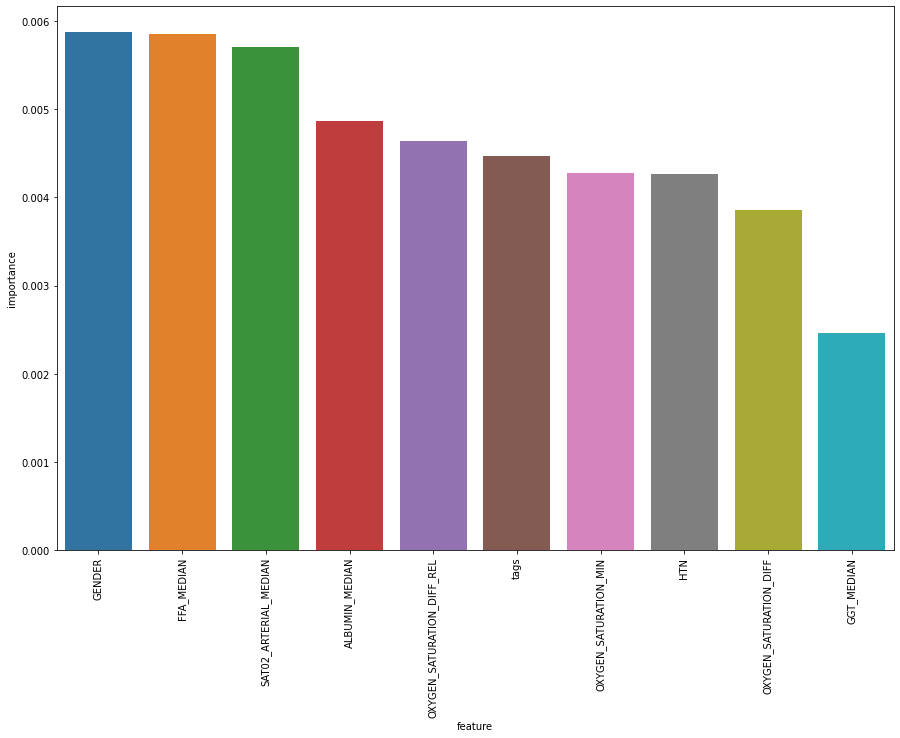

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="feature", y="importance", data=importace_df.loc[importace_df.shape[0] - 10:]);

<br><p style="font-size:20px; text-align: right;" ><b>Early Prediction</b></p>

<p style="font-size:20px; text-align: right;line-height:30px;">
    حال میخواهیم دقت این داده را برای پیش بینی زودتر بسنجیم. برای اینکار ابتدا داده های پنجره اول بیماران را از داده اصلی جدا میکنیم
</p>

In [48]:
Xted, yted = data_discrete.query("WINDOW == 1").drop(columns = "ICU"), data_discrete.query("WINDOW == 1")["ICU"]

<p style="font-size:20px; text-align: right;line-height:30px;">
    حال معیارهای قبلی را نیز برای پیش بینی های انجام شده برای این داده ها بدست میاوریم
</p>

precision = 0.9947089947089947	 recall = 0.9641025641025641	 f1 = 0.9791666666666667


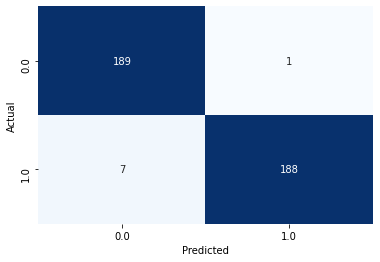

In [49]:
y_pred = RF_clf.predict(Xted)
precision, recall, f1 = precision_score(yted, y_pred), recall_score(yted, y_pred), f1_score(yted, y_pred)

print('precision = {}\t recall = {}\t f1 = {}'.format(precision, recall, f1))
confusion_matrix = pd.crosstab(yted, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap = 'Blues', cbar=False);

<p style="font-size:20px; text-align: right;line-height:30px;">
    همانطور که مشاهده میشود این مدل عملکرد بسیار خوبی روی داده های پنجره اول دارد که نشان میدهد میتوان همان اول مراجعه بیمار به بیمارستان احتمال بستری شدن او در آی سی یو را با دقت خوبی پیش بینی کرد. دقت این مدل در پیش بینی این داده ها حدود 99 درصد و ریکال آن 96 درصد است که باعث شده در کل امتیاز اف-1 حدود 98 داشته باشد
</p>